<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Sprint Challenge
## *Data Science Unit 4 Sprint 1*

After a week of Natural Language Processing, you've learned some cool new stuff: how to process text, how turn text into vectors, and how to model topics from documents. Apply your newly acquired skills to one of the most famous NLP datasets out there: [Yelp](https://www.yelp.com/dataset/challenge). As part of the job selection process, some of my friends have been asked to create analysis of this dataset, so I want to empower you to have a head start.  

The real dataset is massive (almost 8 gigs uncompressed). I've sampled the data for you to something more managable for the Sprint Challenge. You can analyze the full dataset as a stretch goal or after the sprint challenge. As you work on the challenge, I suggest adding notes about your findings and things you want to analyze in the future.

## Challenge Objectives
*Successfully complete these all these objectives to earn a 2. There are more details on each objective further down in the notebook.*
* <a href="#p1">Part 1</a>: Write a function to tokenize the yelp reviews
* <a href="#p2">Part 2</a>: Create a vector representation of those tokens
* <a href="#p3">Part 3</a>: Use your tokens in a classification model on yelp rating
* <a href="#p4">Part 4</a>: Estimate & Interpret a topic model of the Yelp reviews

In [1]:
import pandas as pd

yelp = pd.read_json('./data/review_sample.json', lines=True)

In [2]:
yelp.head()

,business_id,cool,date,funny,review_id,stars,text,useful,user_id
0,nDuEqIyRc8YKS1q1fX0CZg,1,2015-03-31 16:50:30,0,eZs2tpEJtXPwawvHnHZIgQ,1,"BEWARE!!! FAKE, FAKE, FAKE....We also own a sm...",10,n1LM36qNg4rqGXIcvVXv8w
1,eMYeEapscbKNqUDCx705hg,0,2015-12-16 05:31:03,0,DoQDWJsNbU0KL1O29l_Xug,4,Came here for lunch Togo. Service was quick. S...,0,5CgjjDAic2-FAvCtiHpytA
2,6Q7-wkCPc1KF75jZLOTcMw,1,2010-06-20 19:14:48,1,DDOdGU7zh56yQHmUnL1idQ,3,I've been to Vegas dozens of times and had nev...,2,BdV-cf3LScmb8kZ7iiBcMA
3,k3zrItO4l9hwfLRwHBDc9w,3,2010-07-13 00:33:45,4,LfTMUWnfGFMOfOIyJcwLVA,1,We went here on a night where they closed off ...,5,cZZnBqh4gAEy4CdNvJailQ
4,6hpfRwGlOzbNv7k5eP9rsQ,1,2018-06-30 02:30:01,0,zJSUdI7bJ8PNJAg4lnl_Gg,4,"3.5 to 4 stars\n\nNot bad for the price, $12.9...",5,n9QO4ClYAS7h9fpQwa5bhA


## Part 1: Tokenize Function
<a id="#p1"></a>

Complete the function `tokenize`. Your function should
- accept one document at a time
- return a list of tokens

You are free to use any method you have learned this week.

In [9]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_md")

In [8]:
def tokenize(doc):
    tokenizer = nlp.Defaults.create_tokenizer(nlp)
    tokens = tokenizer(doc)
    print(type(tokens))
    return list(tokens)

tokenize('This is a string')

<class 'spacy.tokens.doc.Doc'>


[This, is, a, string]

## Part 2: Vector Representation
<a id="#p2"></a>
1. Create a vector representation of the reviews
2. Write a fake review and query for the 10 most similiar reviews, print the text of the reviews. Do you notice any patterns?
    - Given the size of the dataset, it will probably be best to use a `NearestNeighbors` model for this. 

In [10]:
from sklearn.feature_extraction.text import CountVectorizer

STOP_WORDS = nlp.Defaults.stop_words

from sklearn.feature_extraction.text import TfidfVectorizer
data = yelp['text']
# Instantiate vectorizer object
tfidf = TfidfVectorizer(stop_words=STOP_WORDS, max_features=5000)

# Create a vocabulary and get word counts per document
dtm = tfidf.fit_transform(data)

# View Feature Matrix as DataFrame
docs = pd.DataFrame(dtm.todense(), columns = tfidf.get_feature_names())
docs.head()

,00,000,00pm,07,10,100,1000,101,10pm,11,...,yuck,yuk,yum,yummy,yup,zero,zone,zoo,zucchini,était
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [16]:
from sklearn.neighbors import NearestNeighbors

nn = NearestNeighbors(n_neighbors=5, algorithm='ball_tree')

# Fit on TF-IDF Vectors
nn.fit(dtm.todense())

sample_review = ["""This is really good pizza. The ingredients are always fresh, and they have the perfect balance of crust, sauce, and cheese. 
                    Try the jalapeno mushroom."""]

new = tfidf.transform(sample_review)

matches = nn.kneighbors(new.todense())

In [23]:
pd.options.display.max_colwidth = 1000
for match in matches[1]:
    print(yelp.loc[match]['text'])

6311                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            天氣很熱吃不下東西，今天我點了一個韓國冷面湯、餐後點了甜點，冰沙系列不會太甜膩，覺得店家很用心製作，包含擺盤精緻、佐料衛生，夏日想開胃，這是一個不錯的選擇，服務人員也很敬業，以後會常常來
6204                                                                                                                                                                                                                                                                                                                                                      

**Not sure what the reviews in Mandarin and Japanese say, but the English reviews are spot on.**

## Part 3: Classification
<a id="#p3"></a>
Your goal in this section will be to predict `stars` from the review dataset. 

1. Create a piepline object with a sklearn `CountVectorizer` or `TfidfVector` and any sklearn classifier. Use that pipeline to estimate a model to predict `stars`. Use the Pipeline to predict a star rating for your fake review from Part 2. 
2. Tune the entire pipeline with a GridSearch

In [24]:
# Import Statements
from sklearn.pipeline import Pipeline

from sklearn.linear_model import SGDClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

# Create Pipeline

vect = TfidfVectorizer(stop_words='english')
sgdc = SGDClassifier()

pipe = Pipeline([('vect', vect), ('clf', sgdc)])

In [28]:
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split

X = yelp['text']
y = yelp['stars']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42,
                                                   stratify=y)

pipe.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))])

In [30]:
print(pipe.predict(sample_review))

[5]


**That really is how I would rate this place.**

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(pipe.predict(X_test), y_test)

0.61

In [31]:
from sklearn.model_selection import GridSearchCV

parameters = {
    'vect__max_df': (0.5, 0.75, 1.0),
    'clf__max_iter':(20, 10, 100)
}

grid_search = GridSearchCV(pipe,parameters, cv=5, n_jobs=-1, verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  45 out of  45 | elapsed:   35.0s finished


GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('vect', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=True,
...m_state=None, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'vect__max_df': (0.5, 0.75, 1.0), 'clf__max_iter': (20, 10, 100)},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=1)

In [34]:
accuracy_score(grid_search.best_estimator_.predict(X_test), y_test)

0.6063636363636363

## Part 4: Topic Modeling

Let's find out what those yelp reviews are saying! :D

1. Estimate a LDA topic model of the review text
2. Create 1-2 visualizations of the results
    - You can use the most important 3 words of a topic in relevant visualizations. Refer to yesterday's notebook to extract. 
3. In markdown, write 1-2 paragraphs of analysis on the results of your topic model

__*Note*__: You can pass the DataFrame column of text reviews to gensim. You do not have to use a generator.

In [35]:
import numpy as np
import gensim
import os
import re

from gensim.utils import smart_open, simple_preprocess
from gensim.parsing.preprocessing import STOPWORDS
from gensim import corpora

from gensim.models.ldamulticore import LdaMulticore

def tokenize(text):
    return [token for token in simple_preprocess(text) if token not in STOPWORDS]
yelp['tokens'] = yelp['text'].apply(tokenize)

id2word = corpora.Dictionary(yelp['tokens'])
corpus = [id2word.doc2bow(text) for text in yelp['tokens']]

In [36]:
lda = LdaMulticore(corpus=corpus,
                   id2word=id2word,
                   random_state=723812,
                   num_topics = 20,
                   passes=10,
                   workers=4
                  )

In [37]:
from gensim.models.coherencemodel import CoherenceModel

def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    path : path to input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
#         stream = doc_stream(path)
        model = LdaMulticore(corpus=corpus, num_topics=num_topics, id2word=id2word, workers=4)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [38]:
# Can take a long time to run.
model_list, coherence_values = compute_coherence_values(dictionary=id2word, 
                                                        corpus=corpus, 
                                                        texts=yelp['tokens'], 
                                                        start=2, 
                                                        limit=40, 
                                                        step=6)

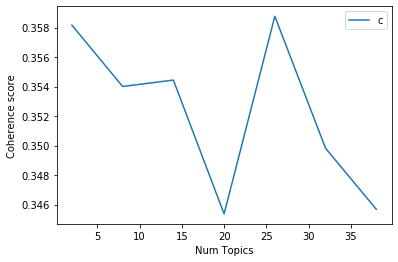

In [41]:
import matplotlib.pyplot as plt
%matplotlib inline
# Show graph
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [45]:
coherence_values

[0.35816693844716213,
 0.3540091963764717,
 0.35444300812655644,
 0.34536951915031927,
 0.35877169160815464,
 0.3498220207196986,
 0.3456842304802128]

In [46]:
# Looks like 26 is the sweet spot, though they're all pretty similar...

lda = model_list[4]

In [47]:
import pyLDAvis.gensim

pyLDAvis.enable_notebook()

pyLDAvis.gensim.prepare(lda, corpus, id2word)

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
13     0.016648  0.006270       1        1  10.515226
3      0.021942  0.010985       2        1   7.592346
5      0.045856 -0.025262       3        1   6.325380
11     0.003480  0.005986       4        1   5.222133
10    -0.016791  0.029746       5        1   4.850386
7      0.004488  0.000136       6        1   4.535420
20    -0.011527  0.012015       7        1   4.447754
14     0.026991 -0.019578       8        1   4.394529
2      0.012617  0.002404       9        1   4.356035
9      0.025517 -0.003302      10        1   4.353191
17     0.010334 -0.002784      11        1   4.341271
24     0.010163  0.009778      12        1   3.701804
1     -0.009485  0.006735      13        1   3.428113
8      0.023494 -0.032480      14        1   3.059644
0      0.004174 -0.001755      15        1   3.006420
22     0.001265  0.009423      16        1   2.988928
12    -0.010455  0.012868      17        1   2.977061
19    -0.013855  0.017093      18        1   2.662274
6     -0.016640  0.038400      19        1   2.648206
23    -0.002653  0.004145      20        1   2.611449
4      0.018335 -0.020128      21        1   2.560119
18     0.008286  0.003534      22        1   2.508158
16    -0.015974  0.014446      23        1   2.324340
21    -0.020381  0.011851      24        1   1.872160
15    -0.019164 -0.053596      25        1   1.660799
25    -0.096664 -0.036930      26        1   1.056857, topic_info=     Category         Freq          Term        Total  loglift  logprob
133   Default  4531.000000         place  4531.000000  30.0000  30.0000
144   Default  4826.000000          food  4826.000000  29.0000  29.0000
208   Default  4138.000000         great  4138.000000  28.0000  28.0000
45    Default  3502.000000       service  3502.000000  27.0000  27.0000
40    Default  4613.000000          good  4613.000000  26.0000  26.0000
18    Default  3368.000000          like  3368.000000  25.0000  25.0000
34    Default  3389.000000          time  3389.000000  24.0000  24.0000
115   Default  1840.000000            ve  1840.000000  23.0000  23.0000
735   Default  1569.000000          love  1569.000000  22.0000  22.0000
184   Default  1088.000000     recommend  1088.000000  21.0000  21.0000
209   Default   373.000000          hair   373.000000  20.0000  20.0000
117   Default  1413.000000          went  1413.000000  19.0000  19.0000
122   Default  1744.000000          best  1744.000000  18.0000  18.0000
1266  Default  1528.000000       ordered  1528.000000  17.0000  17.0000
381   Default  1367.000000        little  1367.000000  16.0000  16.0000
387   Default  1462.000000         order  1462.000000  15.0000  15.0000
46    Default  1495.000000         staff  1495.000000  14.0000  14.0000
2183  Default   570.000000           car   570.000000  13.0000  13.0000
1277  Default  1426.000000       chicken  1426.000000  12.0000  12.0000
264   Default  1242.000000    experience  1242.000000  11.0000  11.0000
359   Default  1208.000000     delicious  1208.000000  10.0000  10.0000
192   Default  1310.000000       amazing  1310.000000   9.0000   9.0000
440   Default  1149.000000           day  1149.000000   8.0000   8.0000
92    Default  1704.000000          nice  1704.000000   7.0000   7.0000
394   Default   743.000000         pizza   743.000000   6.0000   6.0000
526   Default   932.000000          told   932.000000   5.0000   5.0000
131   Default  1397.000000        people  1397.000000   4.0000   4.0000
30    Default  1172.000000          said  1172.000000   3.0000   3.0000
116   Default   870.000000         vegas   870.000000   2.0000   2.0000
1066  Default  1113.000000           new  1113.000000   1.0000   1.0000
...       ...          ...           ...          ...      ...      ...
115   Topic26    27.064384            ve  1840.105103   0.3305  -5.2345
354   Topic26    11.790409           cut   329.792725   1.2187  -6.06

**The topics produced by the LDA aren't as clearly differentiated as those we found on the Amazon review set yesterday. I suspect those had fewer types of reviews, so the LDA really was capturing actual, distinct topics. Here, even 26 topics is probably too few. We're trying to compress many-dimensional space into just a few subsets, but that's not really practical for a dataset that includes so many different possible subjects. It would probably be helpful to increase the number of topics dramatically, perhaps into the hundreds, but unfortunately I don't have the local resources to make that practical. Perhaps I could work on this at a later date on AWS or another cloud service with more resources.**

**For the same reason the intertopic map wasn't very helpful, I suspect the coherence values graph is misleading. It's curious that all of the coherence values are higher than those measured on yesterday's assignment, despite seeming subjectively *less* coherent. My hypothesis for this is that because the space has much more variation in subjects, the effective regions for topics are much larger within that space, so relative to the distances to the boundaries of the trust regions, the distance to the nearest neighbors is relatively small. It could also be the case that the items in the topics, despite not being clearly differentiated for human eyes, are still relatively tightly clustered around certain contextual similarities in structure and content (see my pizza query earlier).**

## Stretch Goals

Complete one of more of these to push your score towards a three: 
* Incorporate named entity recognition into your analysis
* Compare vectorization methods in the classification section
* Analyze more (or all) of the yelp dataset - this one is v. hard. 
* Use a generator object on the reviews file - this would help you with the analyzing the whole dataset.
* Incorporate any of the other yelp dataset entities in your analysis (business, users, etc.)